In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.ticker as mtick

In [6]:
# Read in the data.
agg = pd.read_csv("../data/3_25_agg.csv")

# Create arrays.
inc_pred_perc = agg.loc[agg["actual"] == 1, ["pred_perc"]].to_numpy().flatten()
dec_pred_perc = agg.loc[agg["actual"] == 0, ["pred_perc"]].to_numpy().flatten()

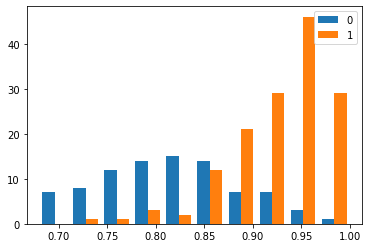

In [8]:
# Create a histogram with two distributions.
plt.hist([dec_pred_perc, inc_pred_perc], label=["0", "1"])
plt.legend(loc="upper right")
plt.show()

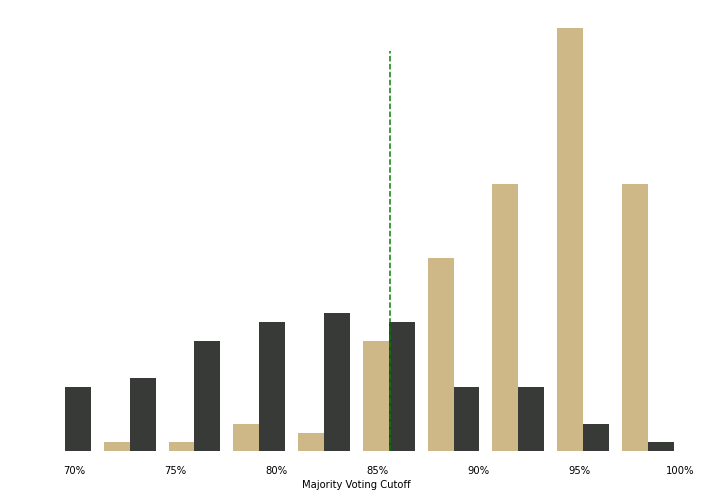

In [74]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
axs.set_yticklabels([])
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
 
# Creating histogram
axs.hist([inc_pred_perc, dec_pred_perc], bins = 10, color=["#CEB888", "#373A36"])
plt.axvline(x=0.8565, color="green", ymin=0, ymax=.90, ls="--")
 
# Adding extra features   
plt.xlabel("Majority Voting Cutoff")
 
# Show plot
plt.savefig("../data/majority_cutoff.jpeg", dpi=300)

In [130]:
cutoffs = np.arange(.0, 1.0, .05)

# Loop.
for cutoff in cutoffs:
    agg["majority_pred"] = agg["pred_perc"].apply(lambda x: 1 if x > cutoff else 0)
    agg["diff"] = agg["majority_pred"] - agg["actual"]
    accuracy = agg.loc[agg["diff"] == 0, :].shape[0] / agg.shape[0]
    agg.drop(columns=["diff"], inplace=True)
    print(f"{round(cutoff, 2):.2f}, acc: {round(accuracy, 4)}")


0.00, acc: 0.6207
0.05, acc: 0.6207
0.10, acc: 0.6207
0.15, acc: 0.6207
0.20, acc: 0.6207
0.25, acc: 0.6207
0.30, acc: 0.6207
0.35, acc: 0.6207
0.40, acc: 0.6207
0.45, acc: 0.6207
0.50, acc: 0.6207
0.55, acc: 0.6207
0.60, acc: 0.6207
0.65, acc: 0.6207
0.70, acc: 0.6466
0.75, acc: 0.7069
0.80, acc: 0.7672
0.85, acc: 0.8362
0.90, acc: 0.7931
0.95, acc: 0.6336


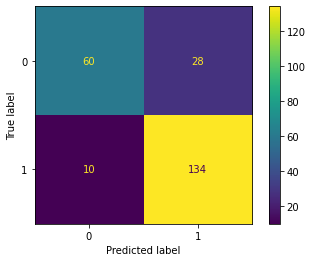

In [131]:
# Create actual DataFrame with predictions.
agg["majority_pred"] = agg["pred_perc"].apply(lambda x: 1 if x > .85 else 0)

# Confusion matrix.
cm = confusion_matrix(agg["actual"], agg["majority_pred"])
ConfusionMatrixDisplay(cm).plot()